In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submissions = pd.read_csv('SampleSubmission.csv')
vd = pd.read_csv('VariableDefinitionsHotspot.csv')

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train.isna().sum()

In [ ]:
cols = train.columns
print(len(cols))
print(cols)

In [ ]:
print(train.dtypes)

In [8]:
#checking the amount of unique values in each feature

def value_count(data, cols):
    for col in cols:
        value = data[col].value_counts().count()
        print('\n' + 'For column' + '                                     ' + col)
        print(value)
        

value_count(train, cols)


For column                                     ID
626644

For column                                     area
3821

For column                                     date
164

For column                                     lat
2780

For column                                     lon
3191

For column                                     burn_area
101109

For column                                     climate_aet
626271

For column                                     climate_def
293742

For column                                     climate_pdsi
626422

For column                                     climate_pet
626461

For column                                     climate_pr
578971

For column                                     climate_ro
433487

For column                                     climate_soil
368956

For column                                     climate_srad
626537

For column                                     climate_swe
3

For column                                     c

In [9]:
train['landcover_3'].value_counts()

0.000000    626394
0.000307        71
0.000307        48
0.000307        36
0.000307        36
0.000307        24
0.000615        24
0.000615        11
Name: landcover_3, dtype: int64

In [10]:
train['climate_swe'].value_counts()

0.000000    626641
0.057212         2
0.277248         1
Name: climate_swe, dtype: int64

In [13]:
train = train.drop('population_density', axis=1)

In [14]:
train.shape

(626644, 31)

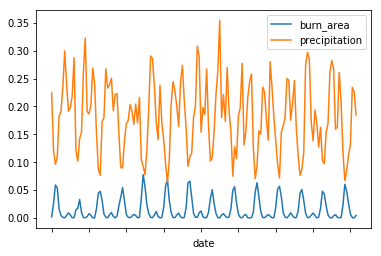

In [17]:
# Let's plot precipitation and burn area on the same plot - note the inverse relationship, and the strong periodic component to both.
ax = train.groupby('date').mean().reset_index().plot(y='burn_area', x='date')
train.groupby('date').mean().reset_index().plot(y='precipitation', x='date', ax=ax)

In [20]:
test = test.drop('population_density', axis=1)

In [22]:
test.head()

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.926180,-953.401012,1360.571291,...,0.0,0.0,0.430648,0.0,0.569045,0.0,0.000307,0.0,0.0,0.000457
1,1_2014-01-01,1,2014-01-01,25.669,5.293,0,154.836847,1193.866315,-961.703043,1348.688788,...,0.0,0.0,0.494624,0.0,0.505068,0.0,0.000307,0.0,0.0,0.000129
2,2_2014-01-01,2,2014-01-01,25.443,5.074,0,127.790933,1223.640222,-962.435857,1351.521823,...,0.0,0.0,0.288343,0.0,0.711657,0.0,0.000000,0.0,0.0,0.000398
3,3_2014-01-01,3,2014-01-01,25.665,5.070,0,136.924571,1201.258784,-961.326298,1338.120278,...,0.0,0.0,0.492103,0.0,0.507897,0.0,0.000000,0.0,0.0,0.000158
4,4_2014-01-01,4,2014-01-01,25.886,5.067,0,144.278146,1197.831547,-959.248284,1342.118844,...,0.0,0.0,0.333855,0.0,0.666145,0.0,0.000000,0.0,0.0,0.000153


In [24]:
test = test.drop('burn_area', axis=1)

In [26]:
Labels = np.array(train['burn_area'])
print(Labels)

[0.00368827 0.         0.         ... 0.         0.         0.        ]


In [27]:
train = train.drop('burn_area', axis=1)

In [32]:
train.shape

(626644, 28)

In [31]:
train = train.drop(['ID', 'date'], axis=1)

In [33]:
Features = np.array(train)

In [36]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(Features[:, :])
Features[:, :] = scaler.transform(Features[:, :])
print(Features[:, :])

[[-1.73159757  0.43753111  1.85451289 ... -0.07444651 -0.12639429
   0.1322863 ]
 [-1.73069097  0.49456614  1.85383075 ... -0.07444651 -0.12639429
   0.04842358]
 [-1.72978438  0.43650345  1.80403446 ... -0.07444651 -0.12639429
   0.23004017]
 ...
 [ 1.72978438  1.48445787 -2.34861303 ... -0.07444651 -0.12639429
   1.04469196]
 [ 1.73069097  1.54174981 -2.34565709 ... -0.07444651 -0.12639429
   0.77124435]
 [ 1.73159757  1.5450897  -2.39522601 ... -0.07444651 -0.12639429
   0.63133742]]


In [37]:
test = test.drop(['ID', 'date'], axis=1)

In [38]:
test.shape

(137556, 28)

In [39]:
test_enc = np.array(test)

In [40]:
scaler1 = preprocessing.StandardScaler().fit(test_enc[:, :])
test_enc[:, :] = scaler1.transform(test_enc[:, :])
print(test_enc[:, :])

[[-1.73159757  0.43753111  1.85451289 ... -0.06949544 -0.12662172
  -1.42280041]
 [-1.73069097  0.49456614  1.85383075 ... -0.06949544 -0.12662172
  -1.42552338]
 [-1.72978438  0.43650345  1.80403446 ... -0.06949544 -0.12662172
  -1.42328543]
 ...
 [ 1.72978438  1.48445787 -2.34861303 ... -0.06949544 -0.12662172
   1.16702286]
 [ 1.73069097  1.54174981 -2.34565709 ... -0.06949544 -0.12662172
   1.20350231]
 [ 1.73159757  1.5450897  -2.39522601 ... -0.06949544 -0.12662172
   1.31436829]]


In [42]:
import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [43]:
indx1 = range(x_train.shape[0])
indx1 = ms.train_test_split(indx1, test_size = 0.2)
x_train1 = x_train[indx1[0],:]
y_train1 = np.ravel(y_train[indx1[0]])
x_train_val = x_train[indx1[1],:]
y_train_val = np.ravel(y_train[indx1[1]])

In [44]:
print(x_train.shape)
print(x_train1.shape)
print(x_train_val.shape)
print(y_train.shape)
print(y_train1.shape)
print(y_train_val.shape)
print(x_test.shape)
print(y_test.shape)

(501315, 28)
(401052, 28)
(100263, 28)
(501315,)
(401052,)
(100263,)
(125329, 28)
(125329,)


In [ ]:
xg_reg = xgb.XGBRegressor(objective = 'reg:logistic', n_estimators = 4000, seed = 123, max_depth = 8,
                           learning_rate=0.01, booster = 'gbtree', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

eval_set = [(x_train1, y_train1), (x_test, y_test)]
xg_reg.fit(x_train1, y_train1, eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds = 200)

[0]	validation_0-rmse:0.68105	validation_1-rmse:0.68108
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.67386	validation_1-rmse:0.67425
[2]	validation_0-rmse:0.66722	validation_1-rmse:0.66738
[3]	validation_0-rmse:0.66070	validation_1-rmse:0.66084
[4]	validation_0-rmse:0.65398	validation_1-rmse:0.65424
[5]	validation_0-rmse:0.64728	validation_1-rmse:0.64754
[6]	validation_0-rmse:0.64119	validation_1-rmse:0.64119
[7]	validation_0-rmse:0.63457	validation_1-rmse:0.63476
[8]	validation_0-rmse:0.62830	validation_1-rmse:0.62832
[9]	validation_0-rmse:0.62187	validation_1-rmse:0.62208
[10]	validation_0-rmse:0.61570	validation_1-rmse:0.61592
[11]	validation_0-rmse:0.60957	validation_1-rmse:0.60977
[12]	validation_0-rmse:0.60345	validation_1-rmse:0.60364
[13]	validation_0-rmse:0.59746	validation_1-rmse:0.59752
[14]	validation_0-rmse:0.59142	validation_1-rmse:0.5

[141]	validation_0-rmse:0.16925	validation_1-rmse:0.16935
[142]	validation_0-rmse:0.16770	validation_1-rmse:0.16775
[143]	validation_0-rmse:0.16611	validation_1-rmse:0.16616
[144]	validation_0-rmse:0.16451	validation_1-rmse:0.16458
[145]	validation_0-rmse:0.16296	validation_1-rmse:0.16301
[146]	validation_0-rmse:0.16137	validation_1-rmse:0.16149
[147]	validation_0-rmse:0.15986	validation_1-rmse:0.15995
[148]	validation_0-rmse:0.15836	validation_1-rmse:0.15843
[149]	validation_0-rmse:0.15687	validation_1-rmse:0.15694
[150]	validation_0-rmse:0.15538	validation_1-rmse:0.15547
[151]	validation_0-rmse:0.15391	validation_1-rmse:0.15402
[152]	validation_0-rmse:0.15252	validation_1-rmse:0.15256
[153]	validation_0-rmse:0.15107	validation_1-rmse:0.15114
[154]	validation_0-rmse:0.14964	validation_1-rmse:0.14971
[155]	validation_0-rmse:0.14828	validation_1-rmse:0.14832
[156]	validation_0-rmse:0.14683	validation_1-rmse:0.14693
[157]	validation_0-rmse:0.14551	validation_1-rmse:0.14557
[158]	validati

[283]	validation_0-rmse:0.05356	validation_1-rmse:0.05386
[284]	validation_0-rmse:0.05326	validation_1-rmse:0.05356
[285]	validation_0-rmse:0.05295	validation_1-rmse:0.05327
[286]	validation_0-rmse:0.05266	validation_1-rmse:0.05298
[287]	validation_0-rmse:0.05237	validation_1-rmse:0.05270
[288]	validation_0-rmse:0.05209	validation_1-rmse:0.05242
[289]	validation_0-rmse:0.05180	validation_1-rmse:0.05214
[290]	validation_0-rmse:0.05153	validation_1-rmse:0.05187
[291]	validation_0-rmse:0.05127	validation_1-rmse:0.05159
[292]	validation_0-rmse:0.05100	validation_1-rmse:0.05133
[293]	validation_0-rmse:0.05073	validation_1-rmse:0.05107
[294]	validation_0-rmse:0.05046	validation_1-rmse:0.05081
[295]	validation_0-rmse:0.05020	validation_1-rmse:0.05056
[296]	validation_0-rmse:0.04996	validation_1-rmse:0.05031
[297]	validation_0-rmse:0.04971	validation_1-rmse:0.05006
[298]	validation_0-rmse:0.04948	validation_1-rmse:0.04982
[299]	validation_0-rmse:0.04922	validation_1-rmse:0.04958
[300]	validati

[425]	validation_0-rmse:0.03562	validation_1-rmse:0.03636
[426]	validation_0-rmse:0.03557	validation_1-rmse:0.03633
[427]	validation_0-rmse:0.03553	validation_1-rmse:0.03629
[428]	validation_0-rmse:0.03550	validation_1-rmse:0.03626
[429]	validation_0-rmse:0.03548	validation_1-rmse:0.03623
[430]	validation_0-rmse:0.03545	validation_1-rmse:0.03620
[431]	validation_0-rmse:0.03540	validation_1-rmse:0.03617
[432]	validation_0-rmse:0.03536	validation_1-rmse:0.03613
[433]	validation_0-rmse:0.03534	validation_1-rmse:0.03611
[434]	validation_0-rmse:0.03531	validation_1-rmse:0.03608
[435]	validation_0-rmse:0.03527	validation_1-rmse:0.03605
[436]	validation_0-rmse:0.03524	validation_1-rmse:0.03602
[437]	validation_0-rmse:0.03520	validation_1-rmse:0.03598
[438]	validation_0-rmse:0.03518	validation_1-rmse:0.03595
[439]	validation_0-rmse:0.03515	validation_1-rmse:0.03592
[440]	validation_0-rmse:0.03511	validation_1-rmse:0.03590
[441]	validation_0-rmse:0.03508	validation_1-rmse:0.03587
[442]	validati

[567]	validation_0-rmse:0.03319	validation_1-rmse:0.03424
[568]	validation_0-rmse:0.03317	validation_1-rmse:0.03423
[569]	validation_0-rmse:0.03316	validation_1-rmse:0.03422
[570]	validation_0-rmse:0.03315	validation_1-rmse:0.03421
[571]	validation_0-rmse:0.03315	validation_1-rmse:0.03421
[572]	validation_0-rmse:0.03314	validation_1-rmse:0.03420
[573]	validation_0-rmse:0.03313	validation_1-rmse:0.03419
[574]	validation_0-rmse:0.03312	validation_1-rmse:0.03419
[575]	validation_0-rmse:0.03311	validation_1-rmse:0.03418
[576]	validation_0-rmse:0.03310	validation_1-rmse:0.03417
[577]	validation_0-rmse:0.03310	validation_1-rmse:0.03417
[578]	validation_0-rmse:0.03309	validation_1-rmse:0.03416
[579]	validation_0-rmse:0.03309	validation_1-rmse:0.03415
[580]	validation_0-rmse:0.03308	validation_1-rmse:0.03415
[581]	validation_0-rmse:0.03307	validation_1-rmse:0.03414
[582]	validation_0-rmse:0.03306	validation_1-rmse:0.03413
[583]	validation_0-rmse:0.03305	validation_1-rmse:0.03412
[584]	validati

[709]	validation_0-rmse:0.03207	validation_1-rmse:0.03336
[710]	validation_0-rmse:0.03207	validation_1-rmse:0.03336
[711]	validation_0-rmse:0.03207	validation_1-rmse:0.03335
[712]	validation_0-rmse:0.03206	validation_1-rmse:0.03335
[713]	validation_0-rmse:0.03205	validation_1-rmse:0.03334
[714]	validation_0-rmse:0.03204	validation_1-rmse:0.03334
[715]	validation_0-rmse:0.03203	validation_1-rmse:0.03333
[716]	validation_0-rmse:0.03201	validation_1-rmse:0.03331
[717]	validation_0-rmse:0.03201	validation_1-rmse:0.03331
[718]	validation_0-rmse:0.03200	validation_1-rmse:0.03330
[719]	validation_0-rmse:0.03200	validation_1-rmse:0.03330
[720]	validation_0-rmse:0.03199	validation_1-rmse:0.03329
[721]	validation_0-rmse:0.03198	validation_1-rmse:0.03329
[722]	validation_0-rmse:0.03198	validation_1-rmse:0.03329
[723]	validation_0-rmse:0.03197	validation_1-rmse:0.03328
[724]	validation_0-rmse:0.03197	validation_1-rmse:0.03328
[725]	validation_0-rmse:0.03196	validation_1-rmse:0.03327
[726]	validati

[851]	validation_0-rmse:0.03094	validation_1-rmse:0.03248
[852]	validation_0-rmse:0.03093	validation_1-rmse:0.03247
[853]	validation_0-rmse:0.03092	validation_1-rmse:0.03247
[854]	validation_0-rmse:0.03090	validation_1-rmse:0.03246
[855]	validation_0-rmse:0.03090	validation_1-rmse:0.03245
[856]	validation_0-rmse:0.03089	validation_1-rmse:0.03245
[857]	validation_0-rmse:0.03088	validation_1-rmse:0.03244
[858]	validation_0-rmse:0.03088	validation_1-rmse:0.03243
[859]	validation_0-rmse:0.03087	validation_1-rmse:0.03243
[860]	validation_0-rmse:0.03086	validation_1-rmse:0.03242
[861]	validation_0-rmse:0.03086	validation_1-rmse:0.03242
[862]	validation_0-rmse:0.03086	validation_1-rmse:0.03242
[863]	validation_0-rmse:0.03085	validation_1-rmse:0.03241
[864]	validation_0-rmse:0.03083	validation_1-rmse:0.03240
[865]	validation_0-rmse:0.03083	validation_1-rmse:0.03240
[866]	validation_0-rmse:0.03082	validation_1-rmse:0.03239
[867]	validation_0-rmse:0.03081	validation_1-rmse:0.03238
[868]	validati

[993]	validation_0-rmse:0.02966	validation_1-rmse:0.03149
[994]	validation_0-rmse:0.02965	validation_1-rmse:0.03148
[995]	validation_0-rmse:0.02964	validation_1-rmse:0.03148
[996]	validation_0-rmse:0.02962	validation_1-rmse:0.03146
[997]	validation_0-rmse:0.02962	validation_1-rmse:0.03146
[998]	validation_0-rmse:0.02961	validation_1-rmse:0.03145
[999]	validation_0-rmse:0.02960	validation_1-rmse:0.03144
[1000]	validation_0-rmse:0.02959	validation_1-rmse:0.03144
[1001]	validation_0-rmse:0.02958	validation_1-rmse:0.03143
[1002]	validation_0-rmse:0.02958	validation_1-rmse:0.03143
[1003]	validation_0-rmse:0.02957	validation_1-rmse:0.03142
[1004]	validation_0-rmse:0.02956	validation_1-rmse:0.03141
[1005]	validation_0-rmse:0.02954	validation_1-rmse:0.03140
[1006]	validation_0-rmse:0.02953	validation_1-rmse:0.03139
[1007]	validation_0-rmse:0.02952	validation_1-rmse:0.03138
[1008]	validation_0-rmse:0.02951	validation_1-rmse:0.03138
[1009]	validation_0-rmse:0.02950	validation_1-rmse:0.03137
[101